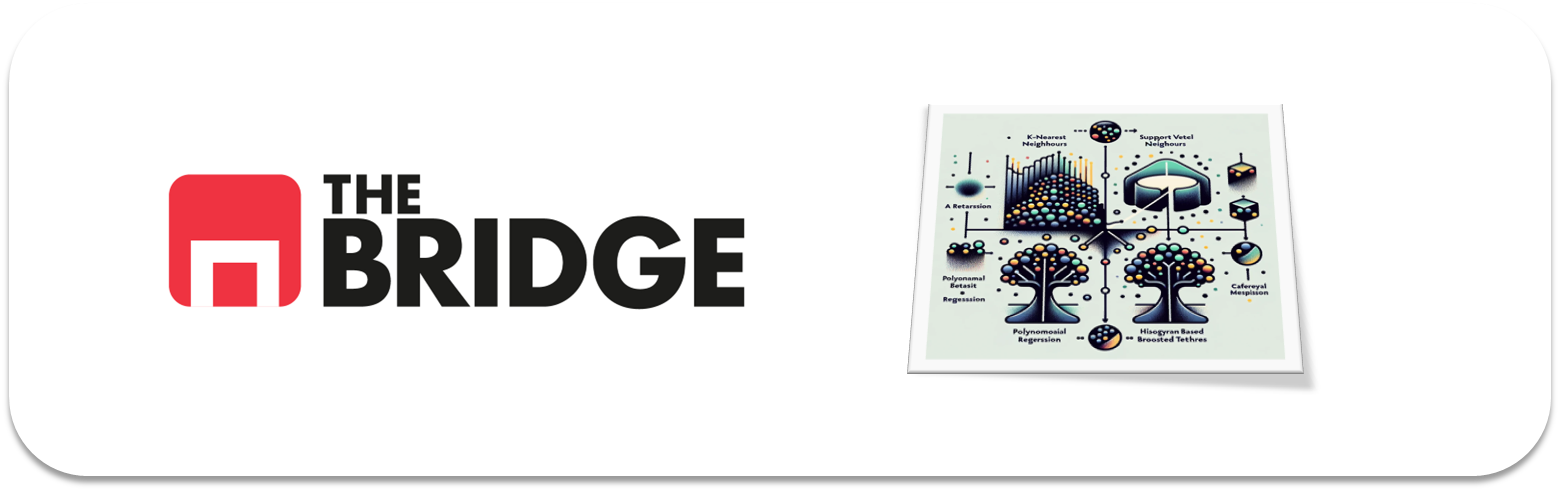

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv("./data/credit_npo.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

Ahira busco un diccionario para enterarme de qué tratan estas columnas:<br>
Variable Name Description Type

* SeriousDlqin2yrs Person experienced 90 days past due delinquency or worse Y/N
* RevolvingUtilizationOfUnsecuredLines Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage
* age Age of borrower in years integer
* NumberOfTime3059DaysPastDueNotWorse Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer
* DebtRatio Monthly debt payments, alimony,living costs divided by monthy gross income percentage
* MonthlyIncome Monthly income real
* NumberOfOpenCreditLinesAndLoans Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer
* NumberOfTimes90DaysLate Number of times borrower has been 90 days or more past due. integer
* NumberRealEstateLoansOrLines Number of mortgage and real estate loans including home equity lines of credit integer
* NumberOfTime60-89DaysPastDueNotWorse Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer
* NumberOfDependents Number of dependents in family excluding themselves (spouse, children etc.) integer

Y ya veo que el target es "SeriousDlqin2yrs"

In [4]:
target = "SeriousDlqin2yrs"

In [5]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [6]:
porcentaje_nulos = df.isna().mean() * 100
for col in df:
    print(f"{col} tiene: {porcentaje_nulos[ col] :.2f}% valores nulos")

SeriousDlqin2yrs tiene: 0.00% valores nulos
RevolvingUtilizationOfUnsecuredLines tiene: 0.00% valores nulos
age tiene: 0.00% valores nulos
NumberOfTime30-59DaysPastDueNotWorse tiene: 0.00% valores nulos
DebtRatio tiene: 0.00% valores nulos
MonthlyIncome tiene: 5.75% valores nulos
NumberOfOpenCreditLinesAndLoans tiene: 0.00% valores nulos
NumberOfTimes90DaysLate tiene: 0.00% valores nulos
NumberRealEstateLoansOrLines tiene: 0.00% valores nulos
NumberOfTime60-89DaysPastDueNotWorse tiene: 0.00% valores nulos
NumberOfDependents tiene: 1.41% valores nulos


In [7]:
cardinalidad = df.nunique()
cardinalidad

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10764
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11547
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

Todas son numéricas, sea integers o float.  <br>
Monthly income es la columna con más datos faltantes, que representan un 5,75%. También a Number_of_Dependents le falta un 1.41% de valores. Quitaré las filas con NaNs.<br> 
Hay una escala de valores muy variada que habrá que escalar para poder entrenar bien los modelos.<br>
Viendo la cardinalidad de cada columna me pregunto si debería tratar algunas como binarias o categóricas, aunque numéricas parece correcto.<br>
La primera columna es el target y es binaria. 

In [8]:
df_copia = df.copy()

In [9]:
df = df.dropna()

In [10]:
df["SeriousDlqin2yrs"].unique()

array([0, 1], dtype=int64)

In [11]:
df["SeriousDlqin2yrs"].value_counts().unique()

array([10986,   830], dtype=int64)

In [12]:
df[target].value_counts(normalize = True)

SeriousDlqin2yrs
0    0.929756
1    0.070244
Name: proportion, dtype: float64

In [13]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

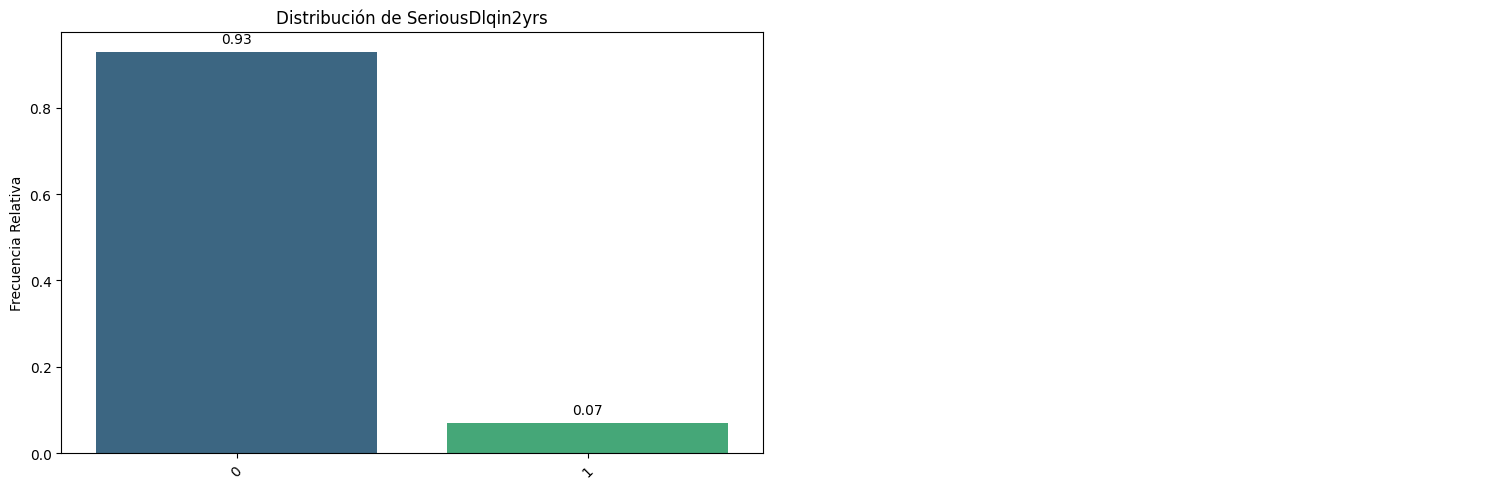

In [14]:
pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)

Tendré que hacer un balanceado de valores ya que el 0 / negativo está sobrerepresentado con el 93%.<br>

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando con un problema de clasificación, donde la variable "SeriousDlqin2yrs" tiene solo 2 valores, 0, (negativo) y 1 (positivo), y vamos a querer predecir bien esos positivos (que responde al objetivo de predecir "si una persona va a encontrarse en dificultades financieras en los dos próximos años").

### #1.3
Pinta la distribución de frecuencias del target y coméntala

(eos ya lo respondí más arriba) Además, antes del modelado, voy a balancear el dataset.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [15]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [16]:
features = train_set.columns.to_list()
features.remove(target)
scaler = StandardScaler()
X_train = train_set[features]
y_train = train_set[target] 
X_test = test_set[features]
y_test = test_set[target] 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)

In [17]:
model_names = ["Logistic Regression","KNeighborsClassifier","Random Forest","XGBoost","LightGBM","CatBoost"]

lr_clf = LogisticRegression(max_iter = 10000)
knn_clf = KNeighborsClassifier(2)
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, iterations=1000, verbose = False)

model_set = [lr_clf, knn_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]

In [18]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):

    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "recall_macro")
# Como el dataset está balanceado, accuracy es una buena medida
    else:
# solo para la regresión logística usamos el X_train escalado
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 3, scoring = "recall_macro")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
KNeighborsClassifier(n_neighbors=2)
RandomForestClassifier(random_state=42)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
LGBMClassifier(random_state=42, verbose=-100)


In [19]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, recall_macro: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, recall_macro: 0.5339089362471351
Model <KNeighborsClassifier>, recall_macro: 0.5008547333101774
Model <Random Forest>, recall_macro: 0.5841538194958317
Model <XGBoost>, recall_macro: 0.5983281027612889
Model <LightGBM>, recall_macro: 0.5916253900230705
Model <CatBoost>, recall_macro: 0.6013431836032557
El ganador es CatBoost


No hago remuestreo por over/sub sampling ya que se supone que CatBoost es bueno manejando estas disoaridades sin compenesaciones ni escalados.

In [20]:
# Primero los valores de Catboost contra train

cat_clf.fit(X_train, y_train)
y_pred_train = cat_clf.predict(X_train)

In [21]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8789
           1       0.98      0.47      0.64       663

    accuracy                           0.96      9452
   macro avg       0.97      0.74      0.81      9452
weighted avg       0.96      0.96      0.96      9452



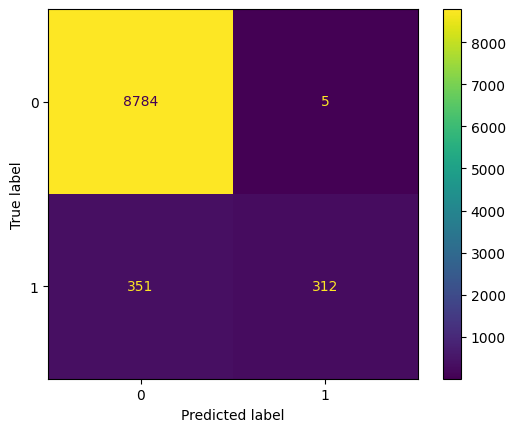

In [22]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

In [23]:
# Ahora para test
cat_clf.fit(X_train, y_train)
y_pred_test = cat_clf.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.58      0.20      0.29       167

    accuracy                           0.93      2364
   macro avg       0.76      0.59      0.63      2364
weighted avg       0.92      0.93      0.92      2364



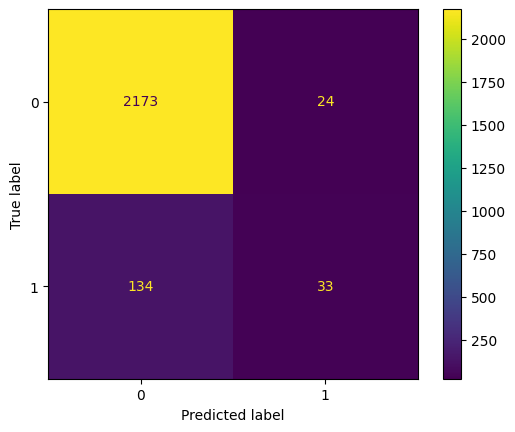

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [26]:
# La verdad es que baja bastante en test el valor del recall macro avg, de 0,74 a 0.59

Ahora optimicemos algunos hiperparámetros

In [27]:
catb_clf = CatBoostClassifier()


params_grid = {
    'iterations': [150, 200, 250, 100], 
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'depth' : [2,4,6,8,10],
    'auto_class_weights': ['Balanced'],
    'verbose' : [False]
}

catb_grid = GridSearchCV(catb_clf,
                       param_grid= params_grid,
                       cv = 3,
                       scoring = "recall_macro",
                       n_jobs = -1)

catb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EFA07444C0>,
             n_jobs=-1,
             param_grid={'auto_class_weights': ['Balanced'],
                         'depth': [2, 4, 6, 8, 10],
                         'iterations': [150, 200, 250, 100],
                         'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'verbose': [False]},
             scoring='recall_macro')

In [28]:
catb_grid.best_params_

{'auto_class_weights': 'Balanced',
 'depth': 4,
 'iterations': 100,
 'learning_rate': 0.1,
 'verbose': False}

In [29]:
catb_grid.best_score_

0.7692234730756189

In [30]:
catb_grid.best_estimator_.score(X_test, y_test)

0.788917089678511

In [31]:
# A ver los resultados del modelo optimizado contra train
y_train_pred = catb_grid.best_estimator_.predict(X_train)
train_classification_report = classification_report(y_train, y_train_pred)
print(train_classification_report)

# Curiosamente contra train sin optimizar daba 0.74

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      8789
           1       0.23      0.81      0.35       663

    accuracy                           0.79      9452
   macro avg       0.60      0.80      0.61      9452
weighted avg       0.93      0.79      0.84      9452



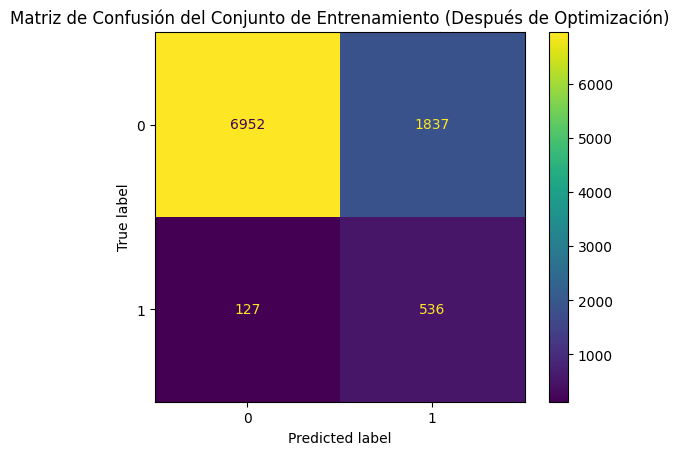

In [32]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.title('Matriz de Confusión del Conjunto de Entrenamiento (Después de Optimización)')
plt.show()

In [33]:
#Y ahora contra test
y_test_pred = catb_grid.best_estimator_.predict(X_test)
test_classification_report = classification_report(y_test, y_test_pred)
print(test_classification_report)

# De 0.59 contra test ha subido a 0.77, parece bastante optimizado!


              precision    recall  f1-score   support

           0       0.98      0.79      0.87      2197
           1       0.21      0.75      0.33       167

    accuracy                           0.79      2364
   macro avg       0.60      0.77      0.60      2364
weighted avg       0.92      0.79      0.84      2364



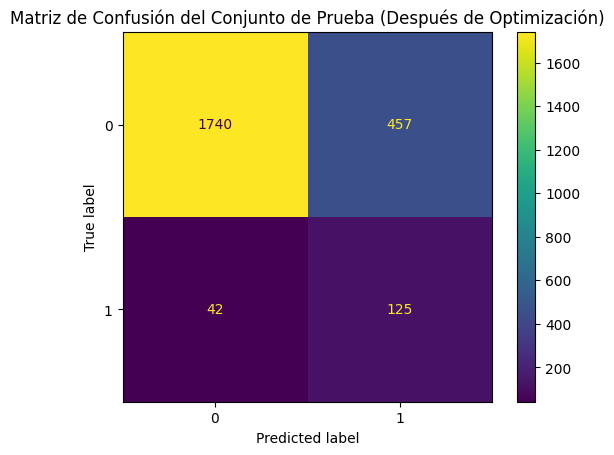

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Matriz de Confusión del Conjunto de Prueba (Después de Optimización)')
plt.show()